In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('Car_data.csv')

In [3]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [4]:
df['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [5]:
market_category_mode = df['Market Category'].mode()[0]

In [6]:
market_category_mode

'Crossover'

In [7]:
fuel_type_mode = df['Engine Fuel Type'].mode()[0]
hp_mode = df['Engine HP'].mode()[0]
cylinders_mode = df['Engine Cylinders'].mode()[0]

In [8]:
df['Engine Fuel Type'].fillna(fuel_type_mode, inplace=True)
df['Engine HP'].fillna(hp_mode, inplace=True)
df['Engine Cylinders'].fillna(cylinders_mode, inplace=True)

In [9]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [12]:
# df.to_csv('cleaned_car_data', index=False)

<AxesSubplot:>

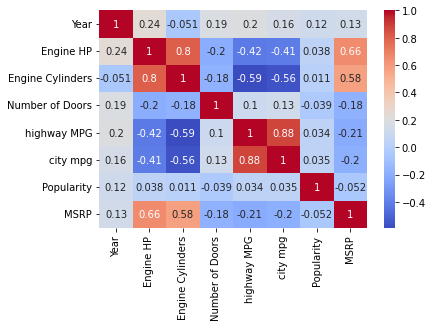

In [13]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

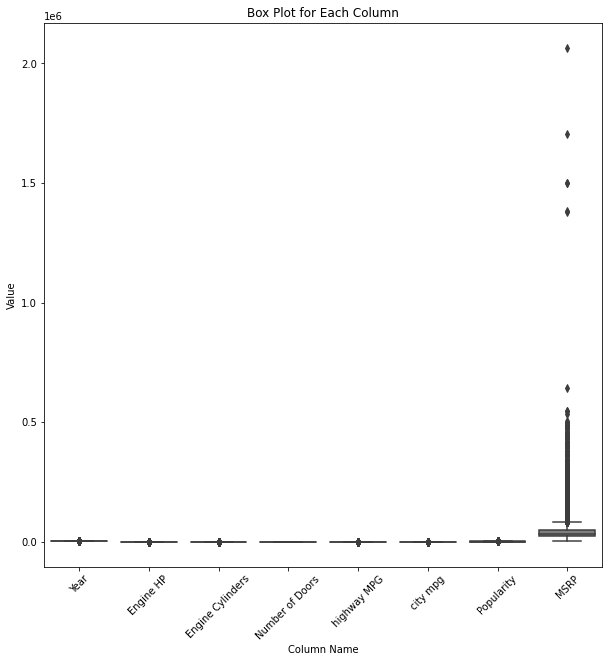

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

# Set labels and title
plt.xlabel('Column Name')
plt.ylabel('Value')
plt.title('Box Plot for Each Column')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)
# Display the plot
plt.show()

In [15]:
corr_matrix = df.corr()
correlations = corr_matrix['MSRP']
sorted_corr = correlations.abs().sort_values(ascending=False)
top_10 = sorted_corr[1:11]
print(top_10)

Engine HP           0.655327
Engine Cylinders    0.577285
highway MPG         0.212748
city mpg            0.197023
Number of Doors     0.184111
Year                0.133773
Popularity          0.052398
Name: MSRP, dtype: float64


In [16]:
Q1 = df['MSRP'].quantile(0.10)
Q3 = df['MSRP'].quantile(0.60)

# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the data
df = df[(df['MSRP'] >= lower_bound) & (df['MSRP'] <= upper_bound)]


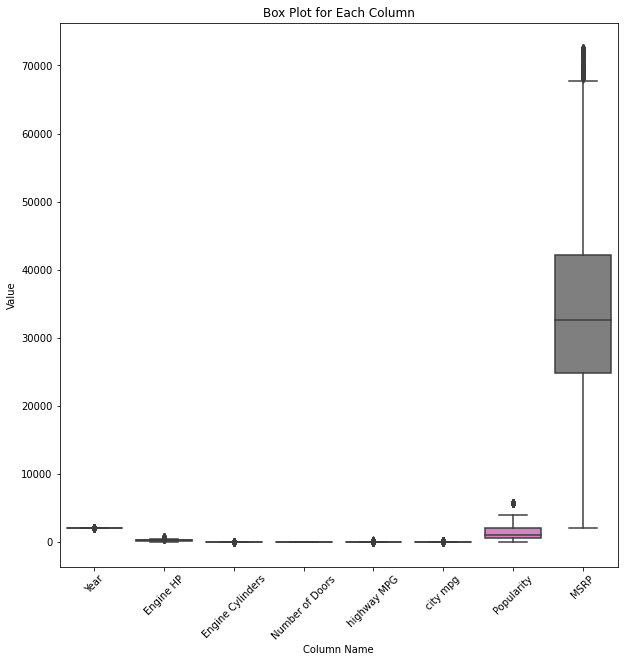

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

# Set labels and title
plt.xlabel('Column Name')
plt.ylabel('Value')
plt.title('Box Plot for Each Column')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)
# Display the plot
plt.show()

In [18]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [19]:
df['Engine Fuel Type'].unique().size
df['Transmission Type'].unique().size
print(df['Driven_Wheels'].unique().size)
print(df['Vehicle Size'].unique().size)
print(df['Vehicle Style'].unique().size)

4
3
16


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'size' column to perform label encoding
df['Engine Fuel Type1'] = label_encoder.fit_transform(df['Engine Fuel Type'])
df.drop('Engine Fuel Type',axis=1,inplace=True)

df['Transmission Type1'] = label_encoder.fit_transform(df['Transmission Type'])
df.drop('Transmission Type',axis=1,inplace=True)
df['Driven_Wheels1'] = label_encoder.fit_transform(df['Driven_Wheels'])
df.drop('Driven_Wheels',axis=1,inplace=True)
df['Vehicle Size1'] = label_encoder.fit_transform(df['Vehicle Size'])
df.drop('Vehicle Size',axis=1,inplace=True)
df['Vehicle Style1'] = label_encoder.fit_transform(df['Vehicle Style'])
df.drop('Vehicle Style',axis=1,inplace=True)

In [21]:
corr_matrix = df.corr()
correlations = corr_matrix['MSRP']
sorted_corr = correlations.abs().sort_values(ascending=False)
top_10 = sorted_corr[1:11]
print(top_10)

Engine HP             0.696518
Year                  0.608963
Engine Cylinders      0.351281
Transmission Type1    0.305609
Vehicle Size1         0.280885
Engine Fuel Type1     0.255227
Driven_Wheels1        0.174677
Vehicle Style1        0.147442
Number of Doors       0.126633
city mpg              0.104518
Name: MSRP, dtype: float64


In [22]:

# Use the Pandas str.get_dummies() function for One-Hot Encoding
one_hot_encoded = df['Market Category'].str.get_dummies(sep=',')

# Concatenate the one-hot encoded columns with the original data
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'market_category' column as it is no longer needed
df.drop('Market Category', axis=1, inplace=True)

In [23]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,...,Crossover,Diesel,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance
0,BMW,1 Series M,2011,335.0,6.0,2.0,26,19,3916,46135,...,0,0,0,1,0,0,1,0,1,0
1,BMW,1 Series,2011,300.0,6.0,2.0,28,19,3916,40650,...,0,0,0,0,0,0,0,0,1,1
2,BMW,1 Series,2011,300.0,6.0,2.0,28,20,3916,36350,...,0,0,0,0,0,0,1,0,1,0
3,BMW,1 Series,2011,230.0,6.0,2.0,28,18,3916,29450,...,0,0,0,0,0,0,0,0,1,1
4,BMW,1 Series,2011,230.0,6.0,2.0,28,18,3916,34500,...,0,0,0,0,0,0,0,0,1,0


In [24]:
# df['Make'].unique().size
# df['Model'].unique().size
df['Make1'] = label_encoder.fit_transform(df['Make'])
df.drop('Make',axis=1,inplace=True)
df['Model1'] = label_encoder.fit_transform(df['Model'])
df.drop('Model',axis=1,inplace=True)

In [25]:
df.head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Engine Fuel Type1,Transmission Type1,...,Exotic,Factory Tuner,Flex Fuel,Hatchback,High-Performance,Hybrid,Luxury,Performance,Make1,Model1
0,2011,335.0,6.0,2.0,26,19,3916,46135,7,3,...,0,1,0,0,1,0,1,0,3,1
1,2011,300.0,6.0,2.0,28,19,3916,40650,7,3,...,0,0,0,0,0,0,1,1,3,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,7,3,...,0,0,0,0,1,0,1,0,3,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,7,3,...,0,0,0,0,0,0,1,1,3,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,7,3,...,0,0,0,0,0,0,1,0,3,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7158 entries, 0 to 11913
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                7158 non-null   int64  
 1   Engine HP           7158 non-null   float64
 2   Engine Cylinders    7158 non-null   float64
 3   Number of Doors     7158 non-null   float64
 4   highway MPG         7158 non-null   int64  
 5   city mpg            7158 non-null   int64  
 6   Popularity          7158 non-null   int64  
 7   MSRP                7158 non-null   int64  
 8   Engine Fuel Type1   7158 non-null   int32  
 9   Transmission Type1  7158 non-null   int32  
 10  Driven_Wheels1      7158 non-null   int32  
 11  Vehicle Size1       7158 non-null   int32  
 12  Vehicle Style1      7158 non-null   int32  
 13  Crossover           7158 non-null   int64  
 14  Diesel              7158 non-null   int64  
 15  Exotic              7158 non-null   int64  
 16  Facto

In [27]:
# sns.boxplot(x=df)

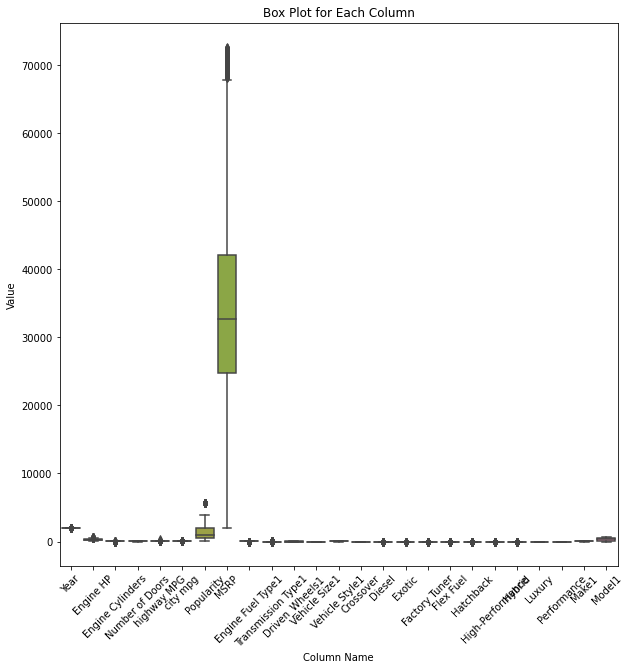

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

# Set labels and title
plt.xlabel('Column Name')
plt.ylabel('Value')
plt.title('Box Plot for Each Column')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)
# Display the plot
plt.show()

In [29]:
corr_matrix = df.corr()
correlations = corr_matrix['MSRP']
sorted_corr = correlations.abs().sort_values(ascending=False)
top_10 = sorted_corr[1:11]
print(top_10)

Engine HP             0.696518
Year                  0.608963
Hatchback             0.386702
Engine Cylinders      0.351281
Luxury                0.336632
High-Performance      0.326115
Transmission Type1    0.305609
Vehicle Size1         0.280885
Engine Fuel Type1     0.255227
Make1                 0.226244
Name: MSRP, dtype: float64


In [30]:
X=df[['Engine HP',
'Engine Cylinders',      
'highway MPG',           
'city mpg',        
'Number of Doors',       
'Transmission Type1',    
'Year',                  
'Vehicle Style1','Popularity',
'Engine Fuel Type1']]

y=df['MSRP']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [31]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [32]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test) 

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:',rmse)

Mean Squared Error: 68296243.91682081
R-squared: 0.6910046693156044
Root Mean Squared Error: 8264.154156162675


In [34]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

print("Predicted values on test set:", predictions)

Predicted values on test set: [31300.  19220.  28492.5 ... 69135.  47975.  42750. ]


In [35]:
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

R-squared: 0.9227516294347218


In [36]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the R-squared score
r2_rf = r2_score(y_test, y_pred)
print("Random Forest R-squared score:", r2_rf)

Random Forest R-squared score: 0.9427920871728502


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the R-squared score
r2_gb = r2_score(y_test, y_pred)
print("Gradient Boosting R-squared score:", r2_gb)

Gradient Boosting R-squared score: 0.8911697175755026
